# Polynomial Regression

In polynomial regression the relationship between the independent variable, $x$, and the dependent (target) variable, $y$, is modelled as a $p$-th degree polynomial in $x$.

Consider the following polynomial regression model
$$
    y_i = \theta_0 + \theta_1 x_j + \theta_2 x_j^2 + \dots + \theta_{p-1} x_j^{p-1} + \eta,  
$$
where $y_i$ is the $i$-th element of the target vector, $x_j$ is the $j$-th feature, $p$ is the number of parameters to be estimated and $\eta$ is the unmodeled error.

The predictor for the target variable is modeled as
$$
    \hat y_i = \theta_0 + \theta_1 x_j + \theta_2 x_j^2 + \dots + \theta_{p-1} x_j^{p-1}.  
$$

The objective is to find the parameter vector that minimizes the prediction error, as follows
$$
    \hat\theta = \argmin_{\theta} \lVert \hat y - y \rVert_2 =  \lVert X\theta - y \rVert_2,
$$
where
$$
    y =
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_N
    \end{bmatrix},
$$
$$
    X =
    \begin{bmatrix}
        1 & x_1 & x_1^2 & \dots & x_1^{p-1} \\
        1 & x_2 & x_2^2 & \dots & x_2^{p-1} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_N & x_N^2 & \dots & x_N^{p-1}
    \end{bmatrix}
$$
and
$$
    \theta = 
    \begin{bmatrix}
        \theta_0 \\
        \theta_1 \\
        \vdots \\
        \theta_{p-1}
    \end{bmatrix}
$$

The estimated parameter vector is given by
$$
    \hat\theta = \left( X^T X \right)^{-1} X^T y = X\dagger y,
$$
where $X\dagger$ is the Moore-Penrose pseudo-inverse matrix of $X$.

In order to exemplify the application of this algorithm, a simple example is shown in the following code.
In this example, the parameter vector is estimated using the linear regression module (which computes the solution using singular value decomposition).

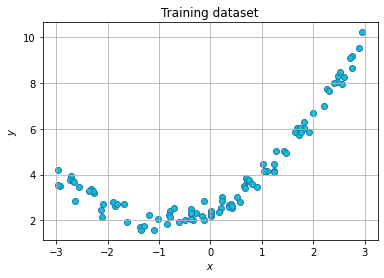

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generates the data
N = 100                         # number of samples
np.random.seed(1234)            # fixes a seed
x = 6*np.random.rand(N, 1) - 3  # generate x
eta = np.random.rand(N, 1)      # white gaussian noise
y = 0.5 * x**2 + x + 2 + eta    # generate y

# Plots the input output data
plt.scatter(x, y, marker='o',
    edgecolors=mcolors.TABLEAU_COLORS.get('tab:blue'),
    c=mcolors.TABLEAU_COLORS.get('tab:cyan'), label='Training dataset')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.title('Training dataset')
plt.show()

LS -- Intercept: [2.47701268]	Coefficients: [0.9999278922354388, 0.5215681844689465]


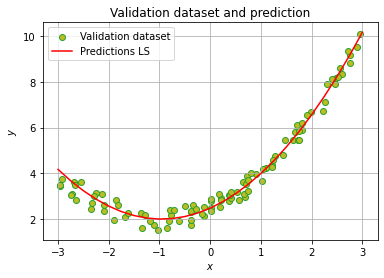

In [72]:
# Generates polynomial and interaction features
# There is only one feature in this case
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
# Uses the linear regression model to fit the data
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
# Intercept (c), and coefficients (b and a)
print(f"LS -- Intercept: {lin_reg.intercept_}\tCoefficients: {lin_reg.coef_[0].tolist()}")

# Generates input data and the output data using the estimated coefficients
x_ = np.arange(-3,3.25,0.25)
y_pred = np.square(x_).dot(lin_reg.coef_[0][1]) + x_.dot(lin_reg.coef_[0][0]) + lin_reg.intercept_

eta2 = np.random.rand(N, 1)      # white gaussian noise
y2 = 0.5 * x**2 + x + 2 + eta2    # generate y

# Plots test dataset along with the data generated from the estimated coefficients
plt.scatter(x, y2, marker='o',
    edgecolors=mcolors.TABLEAU_COLORS.get('tab:green'),
    c=mcolors.TABLEAU_COLORS.get('tab:olive'), label='Validation dataset')
plt.plot(x_, y_pred, '-r', label='Predictions LS')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.title('Validation dataset and prediction')
plt.legend(loc='upper left')
plt.show()
